-------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------Project Title - ANALYZING SWIGGY-BANGALORE OUTLET DATA-----------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------Technology - BUSINESS INTELLIGENCE---------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------Domain - FOOD INDUSTRY-----------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------Tool Preferred - Python(Jupyter Notebook)------------------------------------------------------------

Problem Statement:
The online food ordering market includes foods prepared by restaurants, prepared yb
independent people, and groceries being ordered online and then pickedp or deliveredued.
The first online food ordering service, World Wide Waiter (now knaaown s Waitoer. m),
was founded in 1995. Online food ordering is the proce o ofrorde ing frod f om a
website or other application. The product can be either eady-tfood  ht'
has n t been
specially  for dirpreparedect con. for dir

Do ETL : Extract-Transform-Load the and fing=d me some informoation fm this 
large data. This is fora  of da.t.mining

Find key metrics and facrs and 
show the meaningful relationships beween at..tributesDo your own research and come up with dings.nologies

--------------------------------------------------------First Step : EXTRACTION OF DATA--------------------------------------------------------------------

In [1]:
# IMPORT LIBRARIES-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#L OAD SWIGGY DATA INTO A DATA FRAME-
swiggy_data = pd.read_csv('swiggy.csv')
print("Dataset successfully loaded....")

Dataset successfully loaded....


In [3]:
# PRINT DATASET INFORMATION-
print(swiggy_data)

          ID                    Area       City                Restaurant  \
0        211             Koramangala  Bangalore               Tandoor Hut   
1        221             Koramangala  Bangalore             Tunday Kababi   
2        246               Jogupalya  Bangalore                   Kim Lee   
3        248             Indiranagar  Bangalore         New Punjabi Hotel   
4        249             Indiranagar  Bangalore                       Nh8   
...      ...                     ...        ...                       ...   
8675  464626  Panjarapole Cross Road  Ahmedabad                Malt Pizza   
8676  465835                  Rohini      Delhi  Jay Mata Ji Home Kitchen   
8677  465872                  Rohini      Delhi      Chinese Kitchen King   
8678  465990                  Rohini      Delhi    Shree Ram Paratha Wala   
8679  466488             Navrangpura  Ahmedabad              Sassy Street   

      Price  Avg ratings  Total ratings  \
0     300.0          4.4        

In [4]:
# PRINT FIRST FEW ROWS-
swiggy_data.head()

ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block             56  
2   Double Road             50  
3  80 Feet Road             57  
4  80 Feet Road             63

The dataset contains the following columns:

ID: Unique identifier for each entry.

Area: The area of the city.

City: The city where the restaurant is located (e.g., Bangalore).

Restaurant: The name of the restaurant.

Price: The price range of the food.

Avg ratings: The average rating of the restaurant.

Total ratings: The total number of ratings received by the restaurant.

Food type: The types of cuisine served at the restaurant.

Address: The address of the restaurant.

Delivery time: The time taken for delivery (in minutes).

--------------------------------------------------------Second Step : TRANSFORM DATA-------------------------------------------------------------------

In [5]:
# CHECK FOR MISSING VALUES-
missing_values = swiggy_data.isnull().sum()

# SUMMARIZING MISSING VALUES-
missing_values


ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

The dataset contains no missing values, and the data types for all columns appear to be appropriate for analysis.

In [6]:
# Create indicator columns for each unique cuisine type by one-hot encoding the 'Food type' column
# First, normalize the text to remove trailing spaces and handle any inconsistencies
swiggy_data['Food type'] = swiggy_data['Food type'].str.strip()

# Get dummy variables (one-hot encoding) for each unique cuisine type
cuisine_dummies = pd.get_dummies(swiggy_data['Food type'], prefix='Cuisine')

# Concatenate the original DataFrame with the new one-hot encoded columns
swiggy_transformed = pd.concat([swiggy_data, cuisine_dummies], axis=1)

# Display the updated DataFrame with cuisine type columns
swiggy_transformed.head()



ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  ...  Cuisine_Tibetan,Chinese,Indian  \
0     5Th Block             59  ...                           False   
1     5Th Block             56  ...                           False   
2   Double Road             50  ...                           False   
3  80 Feet Road             57  ...                           False   
4  80 Feet Road             63  ...                           False   

   Cuisine_Tibetan,Fast Food,Chinese,Asian,Snacks,Continental,Desserts,Beverages  \
0                                              False                               
1                                              False                               
2                                              False                               
3                                              False                               
4                                              False                               

   Cuisine_Tibetan,Fast Food,Healthy Food,Asian,Chinese,Snacks,Continental,Desserts,Beverages  \
0                                              False                                            
1                                              False                                            
2                                              False                                            
3                                              False                                            
4                                              False                                            

   Cuisine_Tibetan,Healthy Food,Asian,Chinese,Snacks,Continental,Desserts,Beverages  \
0                                              False                                  
1                                              False                                  
2                                              False                                  
3                                              False                                  
4                                              False                                  

   Cuisine_Tibetan,Italian,Mughlai,Chinese,Kerala  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Cuisine_Tibetan,Lebanese,Fast Food,Tandoor  Cuisine_Tribal,Seafood,Chinese  \
0                                       False                           False   
1                                       False                           False   
2                                       False                           False   
3                                       False                           False   
4                                       False                           False   

   Cuisine_Turkish  Cuisine_Turkish,Arabian  \
0            False                    False   
1            False                    False   
2            False                    False   
3            False                    False   
4            False                    False   

   Cuisine_

In [7]:
# Categorizing 'Price' into Low, Medium, and High categories-
swiggy_transformed['Price Category'] = pd.cut(swiggy_transformed['Price'],
                                              bins=[0, 300, 500, float('inf')],
                                              labels=['Low', 'Medium', 'High'])

# Categorizing 'Avg ratings' into Low, Medium, and High categories-
swiggy_transformed['Rating Category'] = pd.cut(swiggy_transformed['Avg ratings'],
                                               bins=[0, 3, 4, 5],
                                               labels=['Low', 'Medium', 'High'])

# Display the first few rows to verify the new categories--
print(swiggy_transformed[['Price', 'Price Category', 'Avg ratings', 'Rating Category']].head())


   Price Price Category  Avg ratings Rating Category
0  300.0            Low          4.4            High
1  300.0            Low          4.1            High
2  650.0           High          4.4            High
3  250.0            Low          3.9          Medium
4  350.0         Medium          4.0          Medium


In [8]:
# Function to detect outliers using IQR-
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect outliers in Price and Delivery Time-
price_outliers = detect_outliers_iqr(swiggy_transformed['Price'])
delivery_time_outliers = detect_outliers_iqr(swiggy_transformed['Delivery time'])

print("Price Outliers:")
print(price_outliers)

print("\nDelivery Time Outliers:")
print(delivery_time_outliers)


Price Outliers:
5        800.0
6       1000.0
18       800.0
19       800.0
20      1200.0
         ...  
8464     800.0
8466    1200.0
8485    2000.0
8495    1400.0
8573     800.0
Name: Price, Length: 583, dtype: float64

Delivery Time Outliers:
1238     97
1622     95
2149     95
3134     98
3285     96
4767     95
4793     95
4834     98
4915     97
5135     96
5307     95
5327    109
5406     96
5496     97
5628     96
5696     98
5707    100
5793     98
7830     97
8010     95
8405     95
8435     98
Name: Delivery time, dtype: int64


In [9]:
# Removing outliers from the original DataFrame
price_lower_bound = swiggy_transformed['Price'].quantile(0.25) - 1.5 * (swiggy_transformed['Price'].quantile(0.75) - swiggy_transformed['Price'].quantile(0.25))
price_upper_bound = swiggy_transformed['Price'].quantile(0.75) + 1.5 * (swiggy_transformed['Price'].quantile(0.75) - swiggy_transformed['Price'].quantile(0.25))

delivery_time_lower_bound = swiggy_transformed['Delivery time'].quantile(0.25) - 1.5 * (swiggy_transformed['Delivery time'].quantile(0.75) - swiggy_transformed['Delivery time'].quantile(0.25))
delivery_time_upper_bound = swiggy_transformed['Delivery time'].quantile(0.75) + 1.5 * (swiggy_transformed['Delivery time'].quantile(0.75) - swiggy_transformed['Delivery time'].quantile(0.25))

# Filtering the DataFrame to exclude outliers
swiggy_cleaned = swiggy_transformed[
    (swiggy_transformed['Price'] >= price_lower_bound) & (swiggy_transformed['Price'] <= price_upper_bound) &
    (swiggy_transformed['Delivery time'] >= delivery_time_lower_bound) & (swiggy_transformed['Delivery time'] <= delivery_time_upper_bound)
]

# Check the shape of the cleaned DataFrame
print(f"Original DataFrame shape: {swiggy_transformed.shape}")
print(f"Cleaned DataFrame shape: {swiggy_cleaned.shape}")

Original DataFrame shape: (8680, 3746)
Cleaned DataFrame shape: (8076, 3746)


In [10]:
# Summary statistics for the cleaned DataFrame
summary_stats = swiggy_cleaned.describe()
print(summary_stats)


                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8076.000000  8076.000000  8076.000000    8076.000000    8076.000000
mean   249438.171620   299.320951     3.638546     159.913323      53.552997
std    157572.782246   127.804773     0.644513     402.992327      14.169178
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     80756.000000   200.000000     2.900000      50.000000      44.000000
50%    291283.500000   300.000000     3.800000      80.000000      52.000000
75%    396265.750000   400.000000     4.200000     100.000000      63.000000
max    466928.000000   700.000000     5.000000   10000.000000      94.000000


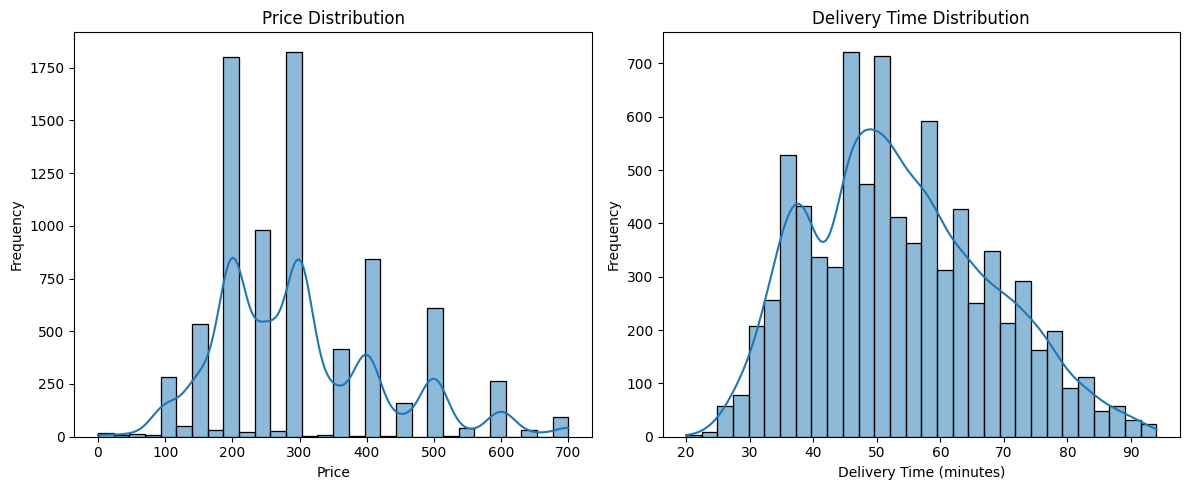

In [11]:
# Plotting histograms for Price and Delivery Time-
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(swiggy_cleaned['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(swiggy_cleaned['Delivery time'], bins=30, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


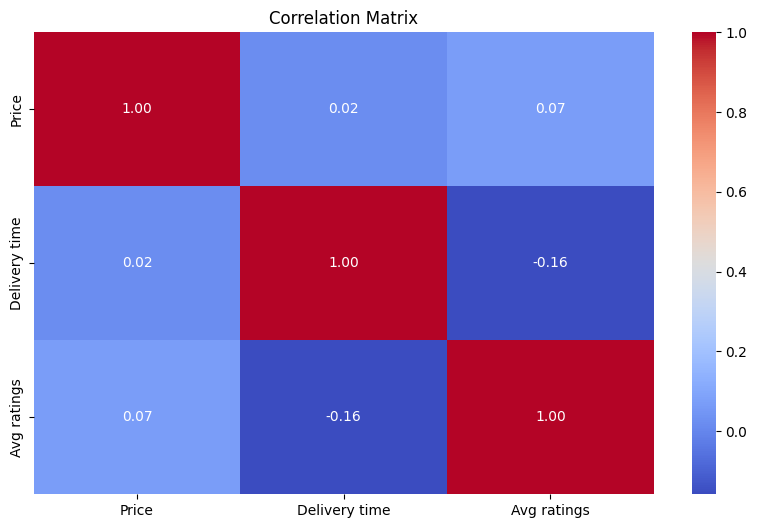

In [12]:
# Correlation heatmap-
plt.figure(figsize=(10, 6))
correlation_matrix = swiggy_cleaned[['Price', 'Delivery time', 'Avg ratings']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


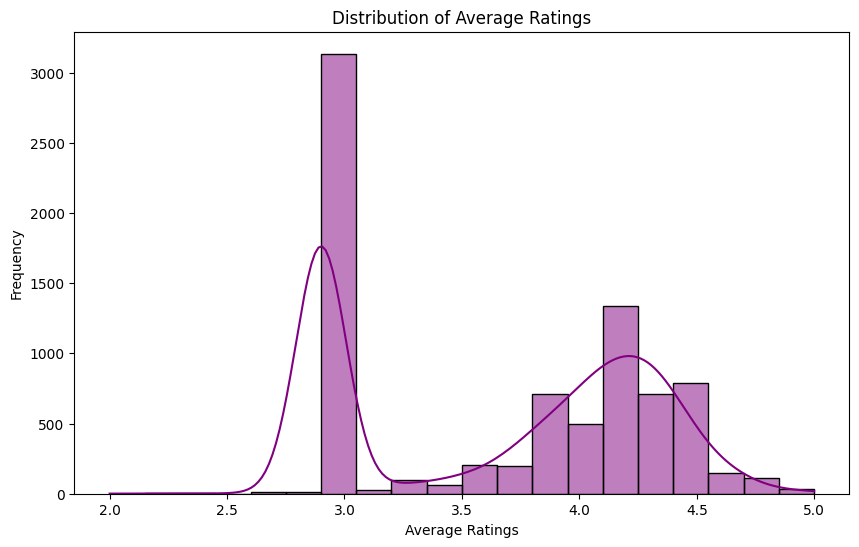

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(swiggy_cleaned['Avg ratings'], bins=20, kde=True, color='purple')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.show()


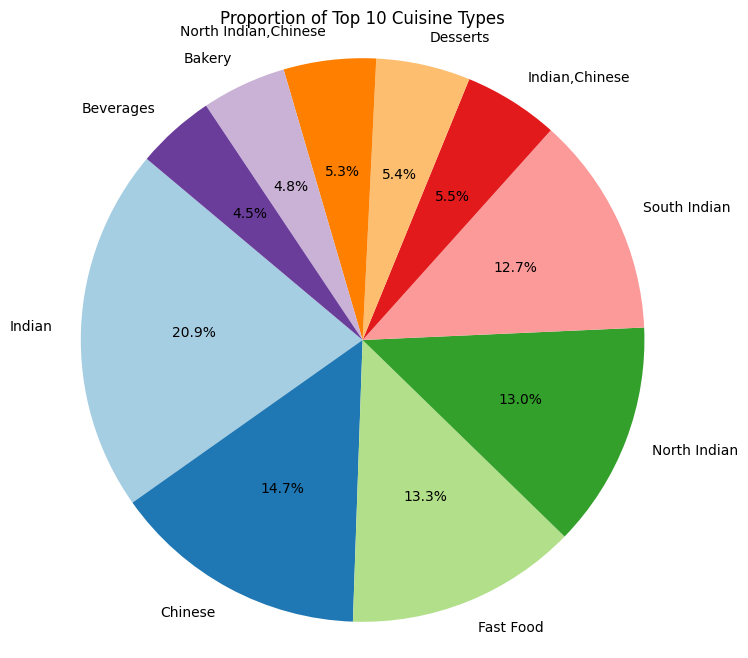

In [20]:
#PIE-CHART - 
# Count the frequency of each cuisine type-
cuisine_counts = swiggy_cleaned['Food type'].value_counts()

# Select the top 10 most frequent cuisine types-
top_10_cuisines = cuisine_counts.nlargest(10)

# Plot a pie chart of the top 10 cuisine types-
plt.figure(figsize=(8, 8))
plt.pie(top_10_cuisines, labels=top_10_cuisines.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Top 10 Cuisine Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


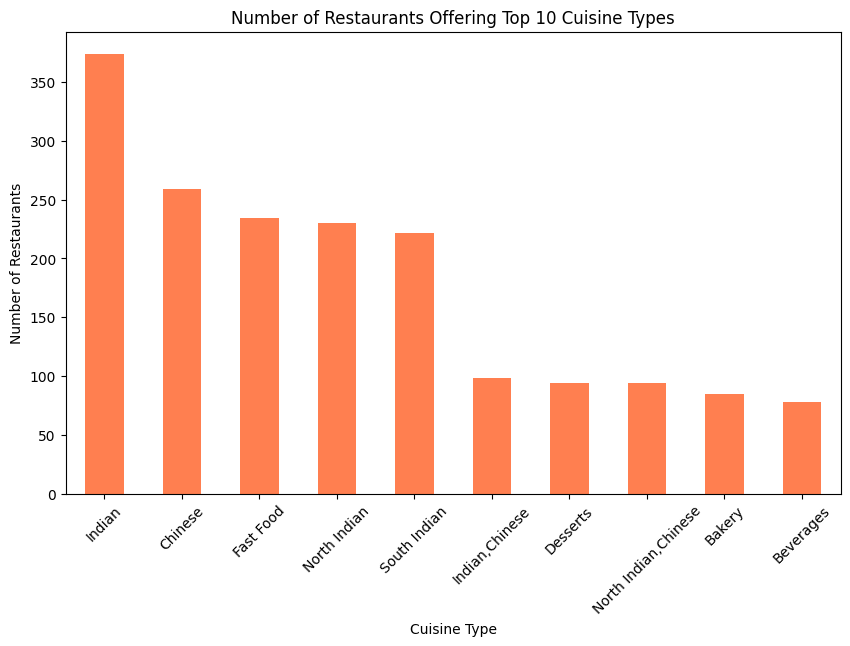

In [21]:
# Count the number of restaurants offering each cuisine type-
restaurant_count_by_cuisine = swiggy_cleaned.groupby('Food type')['Restaurant'].nunique()

# Select the top 10 most frequent cuisine types
top_10_restaurant_count = restaurant_count_by_cuisine.nlargest(10)

# Plot the restaurant count by cuisine
plt.figure(figsize=(10, 6))
top_10_restaurant_count.plot(kind='bar', color='coral')
plt.title('Number of Restaurants Offering Top 10 Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


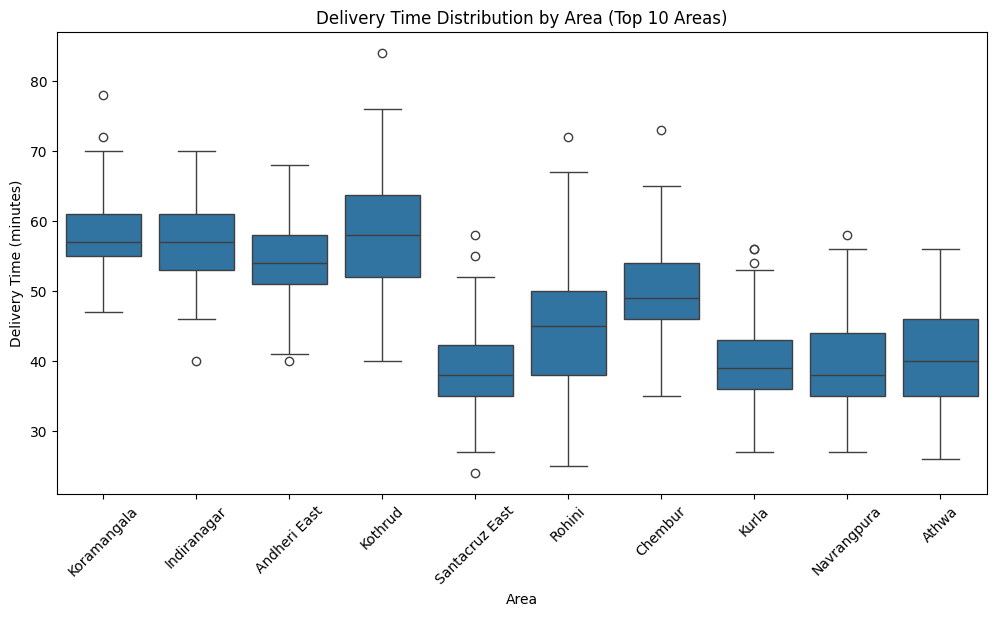

In [23]:
# For simplicity, focus on the top 10 areas with the most restaurants-
top_areas = swiggy_cleaned['Area'].value_counts().nlargest(10).index
filtered_data = swiggy_cleaned[swiggy_cleaned['Area'].isin(top_areas)]

# Plot the box plot of delivery time by area
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='Delivery time', data=filtered_data)
plt.title('Delivery Time Distribution by Area (Top 10 Areas)')
plt.xlabel('Area')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()


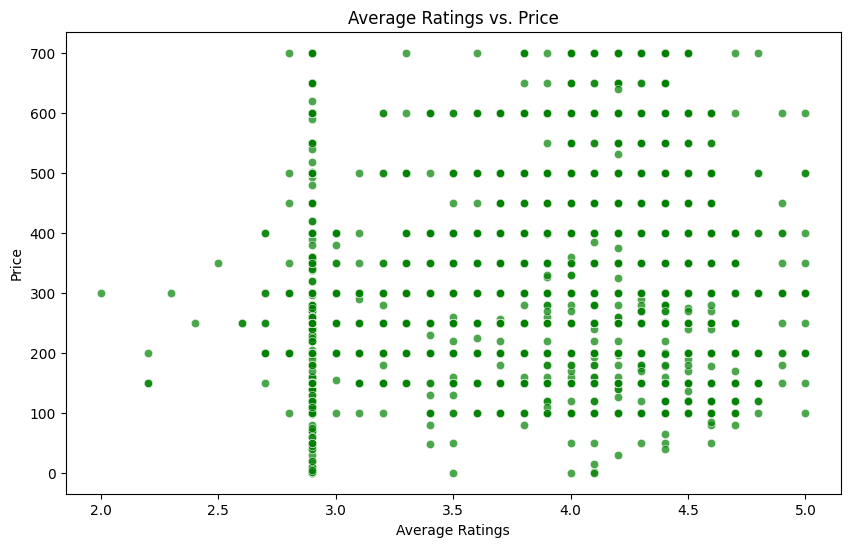

In [27]:
# Scatter plot of Avg ratings vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg ratings', y='Price', data=swiggy_cleaned, alpha=0.7, color='green')
plt.title('Average Ratings vs. Price')
plt.xlabel('Average Ratings')
plt.ylabel('Price')
plt.show()
